In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [6]:
total = np.sum(df['Confirmed'])
deaths = np.sum(df['Deaths'])
recovered = np.sum(df['Recovered'])
print("Mortality: ", deaths / total)
print("% recovered", recovered / total)

Mortality:  0.03968548255709708
% recovered 0.5745029348347455


In [7]:
cuba_data = df.where(df['Country/Region'] == 'Cuba').dropna()
cuba_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
44,Cuba,2532.0,87.0,2351.0,94.0,37.0,0.0,2.0,3.44,92.85,3.7,2446.0,86.0,3.52,Americas


In [8]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [9]:
regions = df['WHO Region'].unique()
df.groupby(['WHO Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].mean()

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Africa,15066.812500,254.645833,9180.104167,5632.062500
Americas,252551.028571,9792.342857,127674.742857,115083.942857
Eastern Mediterranean,67761.090909,1742.681818,54609.090909,11409.318182
Europe,58920.053571,3770.428571,35602.196429,19547.428571
South-East Asia,183529.700000,4134.900000,115693.300000,63701.500000
Western Pacific,18276.750000,515.562500,12923.125000,4838.062500


In [10]:
plt.rcParams['figure.figsize'] = (10, 10)

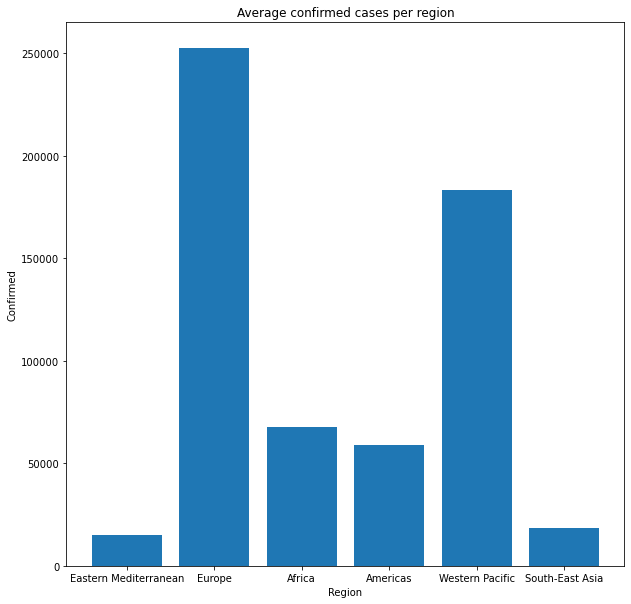

In [11]:
xs = regions
ys = df.groupby(['WHO Region'])['Confirmed'].mean()
plt.bar(xs, ys)
plt.title("Average confirmed cases per region")
plt.xlabel("Region")
plt.ylabel("Confirmed")
plt.show()

In [12]:
df_europe = df.where(df['WHO Region'] == 'Europe').dropna()

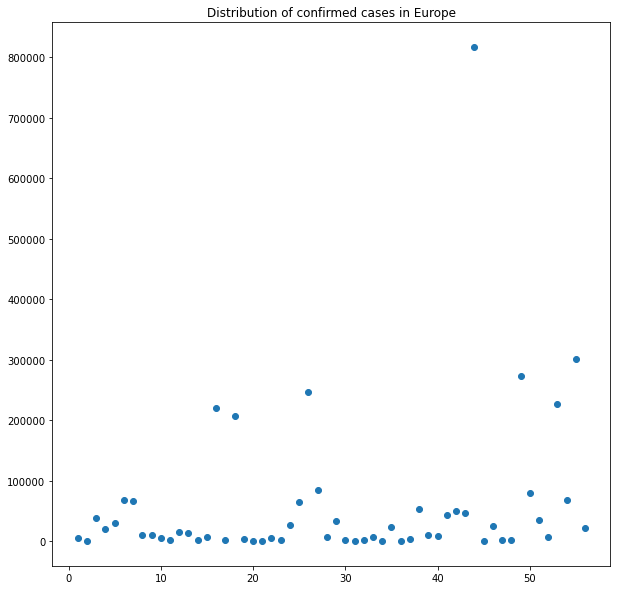

In [13]:
xs = np.arange(1, df_europe.shape[0]+1)
ys = df_europe['Confirmed']
plt.scatter(xs, ys)
plt.title("Distribution of confirmed cases in Europe")
plt.show()

In [14]:
df_europe.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0000,56.000000,56.000000,56.000000
mean,58920.053571,3770.428571,35602.196429,19547.428571,398.107143,5.428571,209.500000,4.198393,68.635000,inf,56193.142857,2726.910714,7.769643
std,127226.689411,9289.098725,91203.401254,46436.223926,869.484961,12.282815,494.610002,3.909265,26.851416,NaN,122197.389003,5854.875321,7.904270
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,12.000000,0.000000,0.000000
25%,2157.500000,66.750000,1291.750000,228.250000,6.750000,0.000000,0.000000,1.612500,55.160000,2.2250,2010.750000,98.000000,2.232500
50%,12191.000000,398.000000,5574.500000,2926.000000,101.500000,1.000000,56.500000,3.090000,76.015000,4.6900,11351.000000,903.500000,4.335000
75%,51077.500000,1686.750000,26011.750000,11335.250000,413.000000,6.000000,190.250000,4.787500,89.732500,6.5325,49579.000000,2639.000000,10.420000
max,816680.000000,45844.000000,602249.000000,254427.000000,5607.000000,85.000000,3077.000000,15.190000,100.000000,inf,776212.000000,40468.000000,32.220000


In [17]:
max_confirmed_europe = np.max(df_europe['Confirmed'])
outliner = df_europe.where(df_europe['Confirmed'] == max_confirmed_europe).dropna()
outliner

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
138,Russia,816680.0,13334.0,602249.0,201097.0,5607.0,85.0,3077.0,1.63,73.74,2.21,776212.0,40468.0,5.21,Europe


In [19]:
df_europe_without_russia = df_europe.drop(138)
df_europe_without_russia.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000,55.000000,55.000000,55.000000
mean,45142.600000,3596.545455,25299.527273,16246.527273,303.400000,3.981818,157.363636,4.245091,68.542182,inf,43101.890909,2040.709091,7.816182
std,75231.068559,9282.280700,49172.174357,39683.524660,508.344102,5.854694,306.808262,3.929501,27.089831,NaN,73713.409057,2838.518978,7.969375
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,12.000000,0.000000,0.000000
25%,2134.000000,64.500000,1209.500000,218.500000,6.500000,0.000000,0.000000,1.665000,55.120000,2.275,2000.500000,98.000000,2.195000
50%,10621.000000,373.000000,5564.000000,2651.000000,94.000000,1.000000,55.000000,3.230000,76.330000,4.750,9249.000000,843.000000,4.130000
75%,48100.500000,1656.000000,24579.000000,10855.000000,406.500000,6.000000,182.500000,4.795000,89.805000,6.585,44577.000000,2482.500000,10.420000
max,301708.000000,45844.000000,210469.000000,254427.000000,2551.000000,24.000000,1833.000000,15.190000,100.000000,inf,296944.000000,11982.000000,32.220000
